<a href="https://colab.research.google.com/github/rrfsantos/Segmentacao-de-Clientes-e-Predicao-de-Campanha-de-Marketing/blob/main/Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import re
import warnings
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime


%matplotlib inline
warnings.filterwarnings('ignore')
np.random.seed(0)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
workdir_path = '/content/drive/My Drive/iFood/'  # Inserir o local da pasta onde estão os arquivos de entrada (treino e teste)
os.chdir(workdir_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Análise exploratória dos dados

In [3]:
# Carregando dataset
dataset = pd.read_csv('ml_project1_data.csv', engine='python')

In [4]:
# Identificando tamanho do dataset, tipos de dados e valores nulos 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# Substituindo valores nulos na coluna 'Income' pela mediana - (A base é muito pequena, evitar deletar linhas)
df = dataset.copy()
median_value = df.Income.median()
df.Income.fillna(value = median_value, inplace=True)

In [6]:
# Removendo as colunas Z_CostContact e Z_Revenue
df.drop(columns=['ID', 'Z_CostContact',	'Z_Revenue'], inplace=True)

In [7]:
for col in ['AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1',	'AcceptedCmp2',	'Complain',	'Response', 'Kidhome', 'Teenhome']:
    df[col] = df[col].astype('object')

In [8]:
# Tranformando a coluna Dt_Customer em número de dias (data fim 2015-01-01)
end_date = datetime.strptime('2015-01-01', '%Y-%m-%d')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%Y.%m.%d')

days = lambda x: int((end_date - x).days)
df.Dt_Customer = df.Dt_Customer.apply(days)

In [9]:
# Substituindo ano menor que 1920 na coluna 'Year_Birth' pela mediana - (A base é muito pequena, evitar deletar linhas)
median_value = df.Year_Birth.median()
mask = df.Year_Birth < 1920
column_name = 'Year_Birth'
df.loc[mask, column_name] = median_value

In [10]:
# Substituindo 'Alone', 'Absurd' e 'YOLO' por 'Single'
single = lambda x: re.sub(r'Alone|Absurd|YOLO', 'Single', x)
df.Marital_Status = df.Marital_Status.apply(single)

### Verificando a distribuição sócio econômica das pessoas entrevistadas.

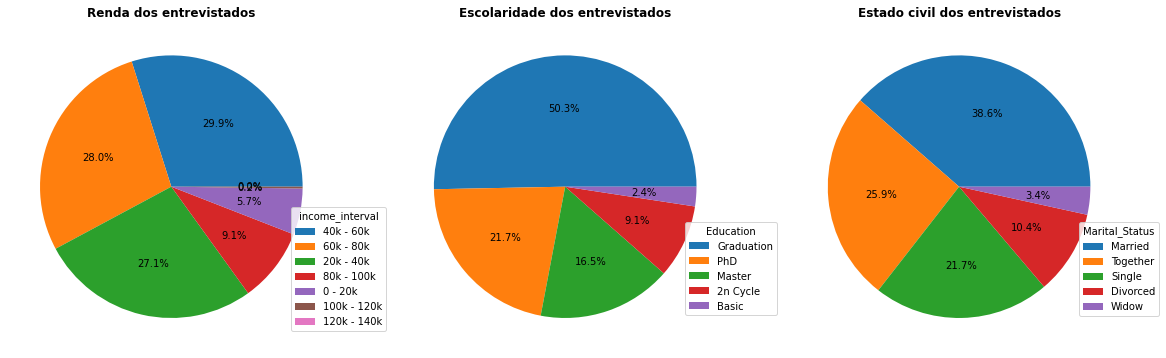

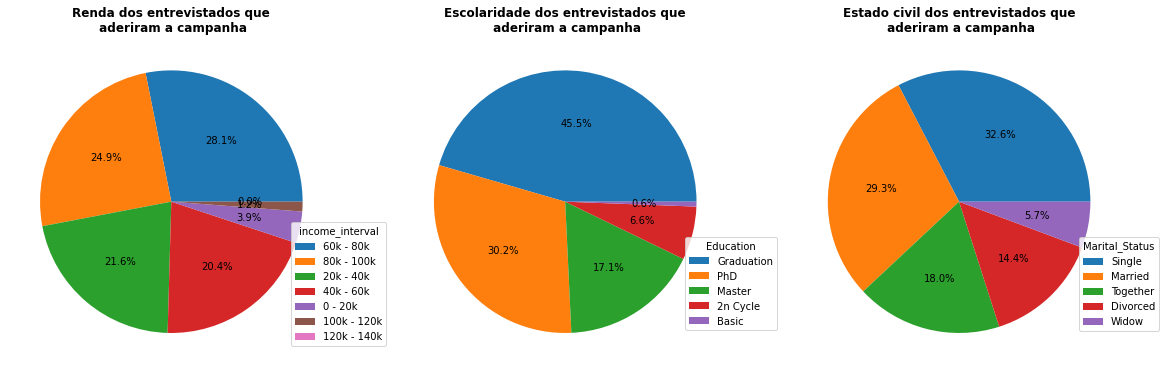

In [19]:
# Renda
data = df.copy()

ranges = [-1,20000,40000,60000,80000,100000,120000,140000]
labels = ['0 - 20k','20k - 40k','40k - 60k','60k - 80k','80k - 100k','100k - 120k','120k - 140k']
data['income_interval'] = pd.cut(data['Income'], ranges, labels = labels)

sizes =  [data['income_interval'].value_counts(), data['Education'].value_counts(), data['Marital_Status'].value_counts()]
columns = ['income_interval', 'Education', 'Marital_Status']
titles = ['Renda dos entrevistados', 'Escolaridade dos entrevistados', 'Estado civil dos entrevistados']

fig, axs = plt.subplots(1, 3, figsize=(20, 20))

axs[0].pie(sizes[0], autopct='%1.1f%%',shadow = False)
axs[0].legend(data[columns[0]].value_counts().index, title = columns[0], loc = 'center left', bbox_to_anchor = (0.85,0,0.5,0.5))
axs[0].set_title(titles[0], fontsize=12, fontweight='bold')
axs[0].set_ylabel('')

# Escolaridade
axs[1].pie(sizes[1], autopct='%1.1f%%',shadow = False)
axs[1].legend(data[columns[1]].value_counts().index, title = columns[1], loc = 'center left', bbox_to_anchor = (0.85,0,0.5,0.5))
axs[1].set_title(titles[1], fontsize=12, fontweight='bold')
axs[1].set_ylabel('')

# Estado civil
axs[2].pie(sizes[2], autopct='%1.1f%%',shadow = False)
axs[2].legend(data[columns[2]].value_counts().index, title = columns[2], loc = 'center left', bbox_to_anchor = (0.85,0,0.5,0.5))
axs[2].set_title(titles[2], fontsize=12, fontweight='bold')
axs[2].set_ylabel('')
plt.savefig('pie1.png')
plt.show();

# Renda para resposta positiva
data_1 = data[data['Response'] == 1]

sizes =  [data_1['income_interval'].value_counts(), data_1['Education'].value_counts(), data_1['Marital_Status'].value_counts()]
columns = ['income_interval', 'Education', 'Marital_Status']
titles = ['Renda dos entrevistados que\n aderiram a campanha', 'Escolaridade dos entrevistados que\n aderiram a campanha',
          'Estado civil dos entrevistados que\n aderiram a campanha']

fig, axs = plt.subplots(1, 3, figsize=(20, 20))

axs[0].pie(sizes[0], autopct='%1.1f%%',shadow = False)
axs[0].legend(data_1[columns[0]].value_counts().index, title = columns[0], loc = 'center left', bbox_to_anchor = (0.85,0,0.5,0.5))
axs[0].set_title(titles[0], fontsize=12, fontweight='bold')
axs[0].set_ylabel('')

# Escolaridade para resposta positiva
axs[1].pie(sizes[1], autopct='%1.1f%%',shadow = False)
axs[1].legend(data_1[columns[1]].value_counts().index, title = columns[1], loc = 'center left', bbox_to_anchor = (0.85,0,0.5,0.5))
axs[1].set_title(titles[1], fontsize=12, fontweight='bold')
axs[1].set_ylabel('')

# Estado civil para resposta positiva
axs[2].pie(sizes[2], autopct='%1.1f%%',shadow = False)
axs[2].legend(data_1[columns[2]].value_counts().index, title = columns[2], loc = 'center left', bbox_to_anchor = (0.85,0,0.5,0.5))
axs[2].set_title(titles[2], fontsize=12, fontweight='bold')
axs[2].set_ylabel('')
plt.savefig('pie2.png')
plt.show()

### Verificando Outliers

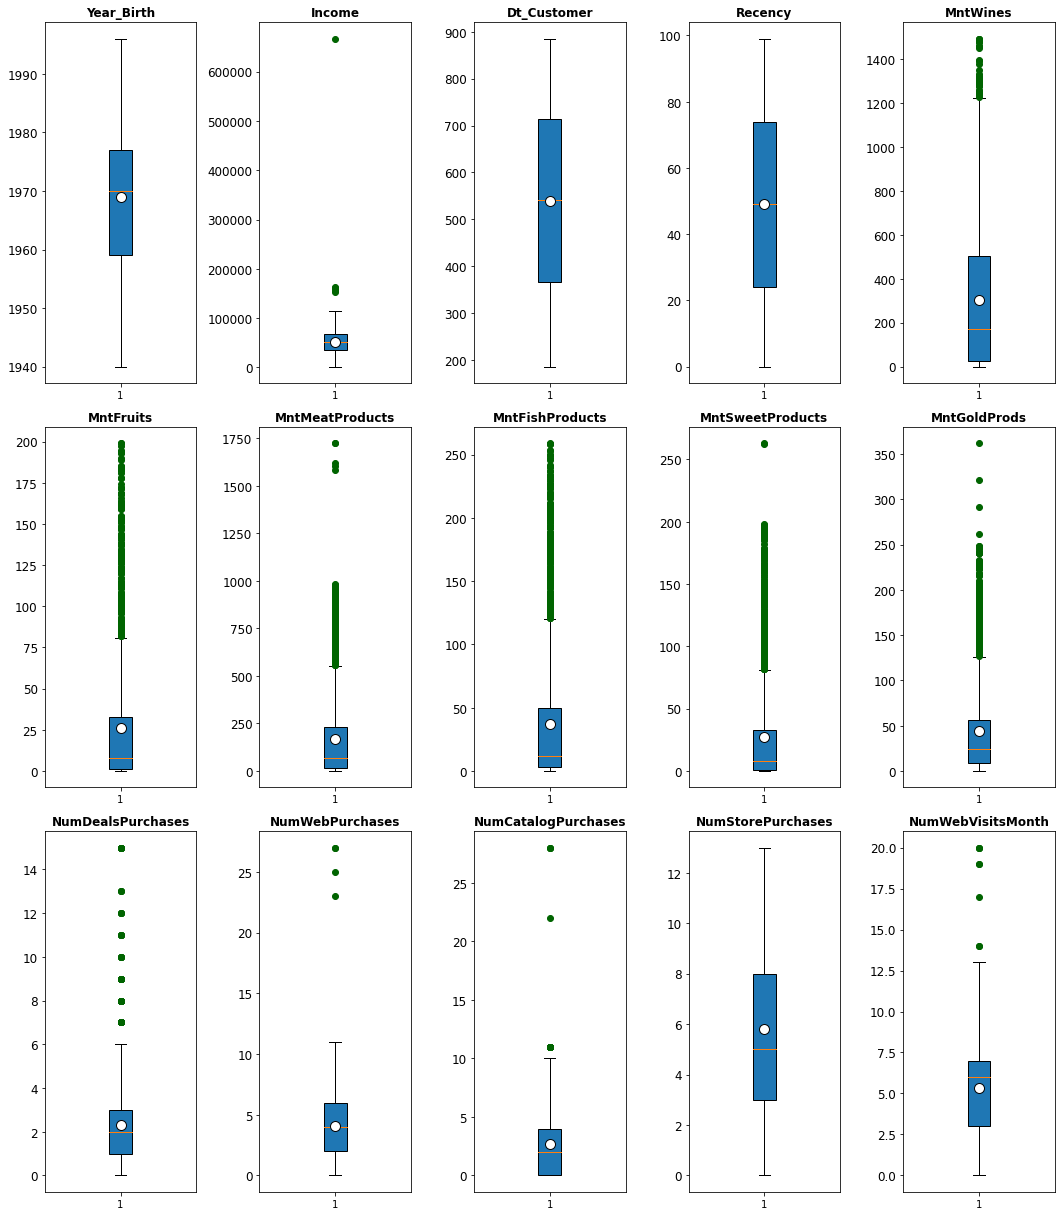

In [12]:
# Criando subplot de cada coluna em sua própria escala
df_num=df.select_dtypes(exclude=['object']).copy()

fig, ax = plt.subplots(3, round(len(df_num.columns)/3), figsize=(15,17))

for i, ax in enumerate(ax.flat):
    ax.boxplot(df_num.iloc[:,i], patch_artist=True, showmeans=True,
               meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black","markersize":"10"},
               flierprops={'marker':'o', 'markerfacecolor':'darkgreen', 'markeredgecolor':'darkgreen'})
    ax.set_title(df_num.columns[i], fontsize=12, fontweight='bold')
    plt.subplots_adjust(wspace=.5, hspace=.5)
    ax.tick_params(axis='y', labelsize=12)
    
plt.tight_layout()

#### Verificando a existência de Outliers de acordo com a resposta do cliente

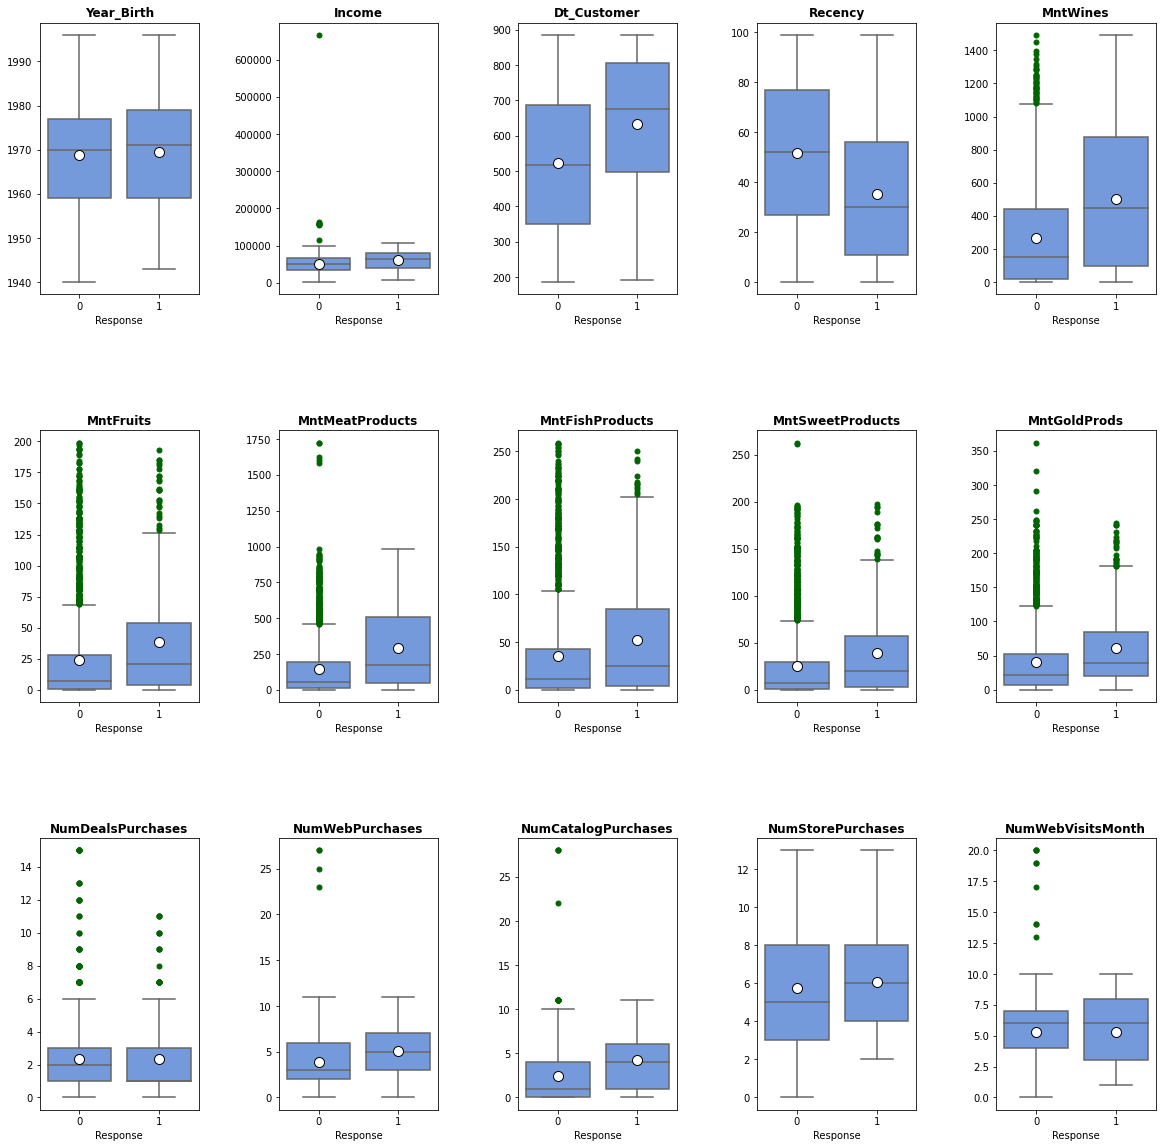

In [13]:
# Criando subplot de cada coluna agrupada por resposta
df['Response'] = df['Response'].astype('int')
df_response=df.select_dtypes(exclude=['object']).copy()

inputs = list((df_response.iloc[:, :-1]).columns)
num_inputs = len(inputs)

fig, axs = plt.subplots(3, round(num_inputs/3), figsize=(20,20))

for i, (ax, col) in enumerate(zip(axs.flat, inputs)):
    sns.boxplot(x=df_response.Response, y=df_response[col], ax=ax, color='cornflowerblue', showmeans=True,
                meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"},
                flierprops={'marker':'o', 'markerfacecolor':'darkgreen', 'markeredgecolor':'darkgreen'})
    ax.set_title(inputs[i], fontsize=12, fontweight='bold')
    plt.subplots_adjust(wspace=.5, hspace=.5)
    ax.set_ylabel('')

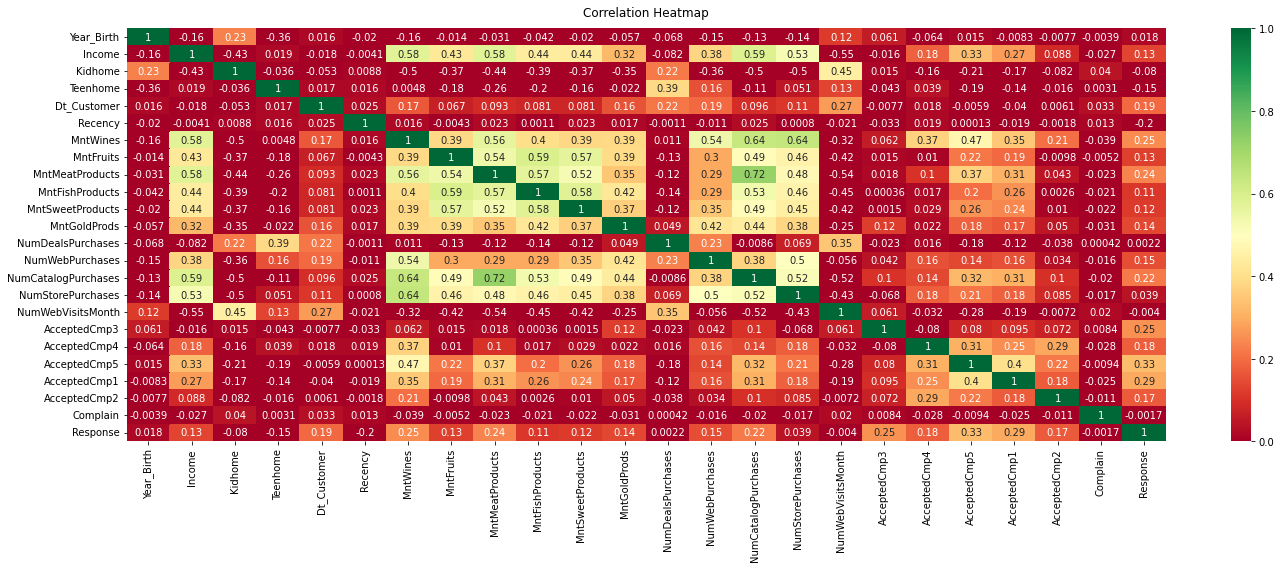

In [17]:
for col in ['AcceptedCmp3',	'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1',	'AcceptedCmp2',	'Complain', 'Kidhome', 'Teenhome']:
    df[col] = df[col].astype('int')
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(df.corr(), vmin=0, vmax=1, annot=True, cmap = 'RdYlGn')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.tight_layout()
plt.savefig('heatmap1.png')
plt.show()

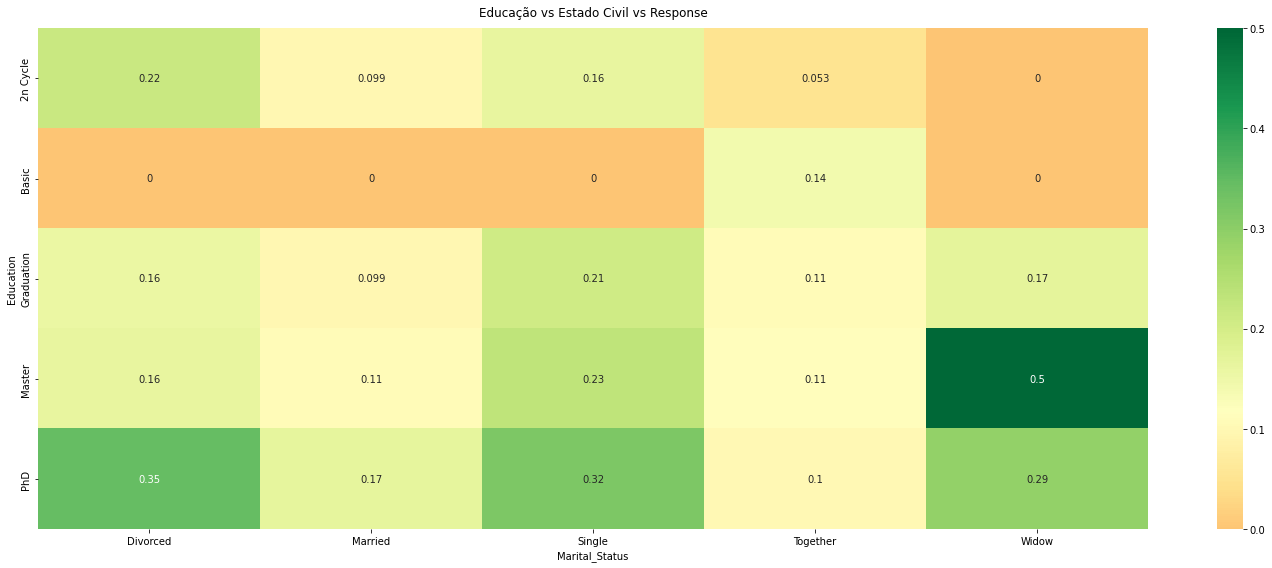

In [15]:
# Criando heatmap de Educação vs Estado Civil vs Response
result = pd.pivot_table(data=df, index='Education', columns='Marital_Status', values='Response')
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
heatmap.set_title('Educação vs Estado Civil vs Response', fontdict={'fontsize':12}, pad=12);
plt.tight_layout()
plt.savefig('heatmap2.png')
plt.show()

0    1906
1     334
Name: Response, dtype: int64


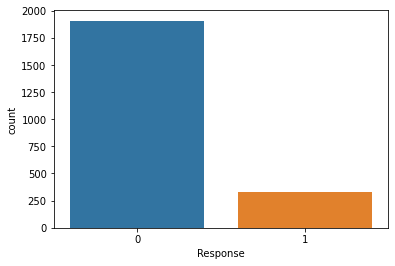

In [16]:
# Verificando o balanceamento do dataset
sns.countplot(data=df, x='Response');
print(df.Response.value_counts())